<a href="https://colab.research.google.com/github/venusonavane/myRepo/blob/main/BECOD454_DL_6TH_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Name: Venu A Sonavane <br>
Roll no: BECOD454 <br>
Div: D <br>
##Topic : Stock price prediction using RNN.

In [3]:
# Part 1 - Data Preprocessing

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [4]:
# Importing the training set
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')
training_set = dataset_train.iloc[:, 1:2].values

In [5]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [6]:
# Creating a data structure with 60 timesteps and 1 output
X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [7]:
# Part 2 - Building the RNN

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout


In [8]:
# Initialising the RNN
regressor = Sequential()

regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)


Epoch 1/100
38/38 [==============================] - 14s 151ms/step - loss: 0.0396
Epoch 2/100
38/38 [==============================] - 5s 128ms/step - loss: 0.0070
Epoch 3/100
38/38 [==============================] - 6s 151ms/step - loss: 0.0057
Epoch 4/100
38/38 [==============================] - 5s 128ms/step - loss: 0.0055
Epoch 5/100
38/38 [==============================] - 5s 140ms/step - loss: 0.0055
Epoch 6/100
38/38 [==============================] - 5s 136ms/step - loss: 0.0054
Epoch 7/100
38/38 [==============================] - 5s 129ms/step - loss: 0.0048
Epoch 8/100
38/38 [==============================] - 6s 152ms/step - loss: 0.0045
Epoch 9/100
38/38 [==============================] - 5s 129ms/step - loss: 0.0049
Epoch 10/100
38/38 [==============================] - 6s 151ms/step - loss: 0.0050
Epoch 11/100
38/38 [==============================] - 5s 128ms/step - loss: 0.0045
Epoch 12/100
38/38 [==============================] - 6s 150ms/step - loss: 0.0040
Epoch 13/100

In [9]:

# Part 3 - Making the predictions and visualising the results

dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

# Getting the predicted stock price of 2017
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

1/1 [==============================] - 2s 2s/step


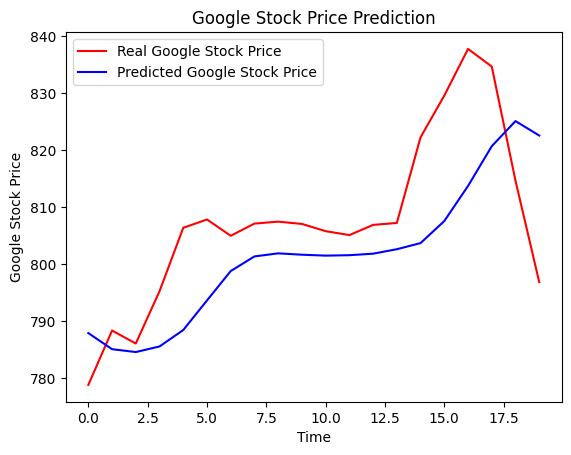

In [10]:
# Visualising the results
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()